In [68]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

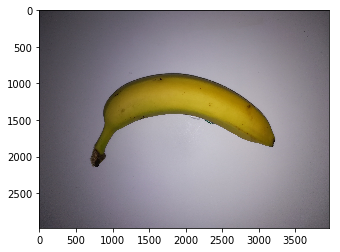

In [69]:
# read image
img = cv2.imread('../images_to_classify/IMG_20181119_225244.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

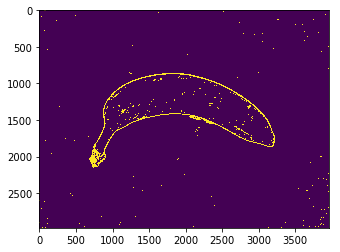

In [70]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
# threshold image
threshed_img = cv2.adaptiveThreshold(gray, 80, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

#enhance contours by dilating them
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(thresh, kernel)
    
# find contours
_, contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(dilated)

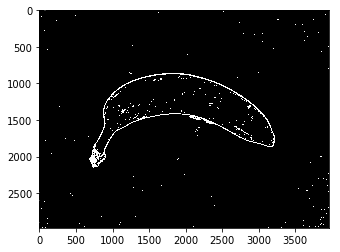

In [71]:
#insert fruit area of original image onto a new image with black background
mask = np.zeros_like(img)

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
out[mask==0] = img[mask==0]

cv2.fillPoly(mask, pts = contours, color = (255,255,255))

plt.imshow(mask)

In [72]:
# with each contour, draw boundingRect in green
# a minAreaRect in blue
minAreaRect = []
boxes = []

for i,c in enumerate(contours):
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c);
    box = cv2.boxPoints(rect);
    # convert all coordinates floating point values to int
    box = np.int0(box)
    minAreaRect = box
    boxes.append((i,box,w,h))
    # draw a blue 'nghien' rectangle
    cv2.drawContours(mask, [box], 0, (0, 0, 255), 3)

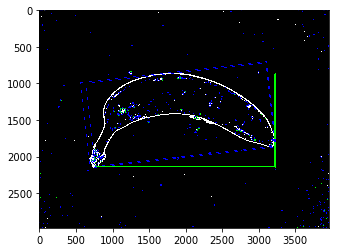

In [73]:
#show image with all the contours detected
plt.imshow(mask)

In [74]:
#order all the contours by area from biggest to smallest
boxes.sort(key=lambda x: x[2]*x[3], reverse=True)

#now we want to select the second biggest box (since the biggest one is the contour of the whole image)
minAreaRectangle = boxes[1][1]
minAreaRectangleIndex = boxes[1][0]

#show that this is the contour we want
imgWithBox = cv2.imread('../images/banana1.jpg')
imgWithBox = cv2.cvtColor(imgWithBox, cv2.COLOR_BGR2RGB)
cv2.drawContours(imgWithBox, [minAreaRectangle], 0, (0, 0, 255), 3)
plt.imshow(imgWithBox)

error: OpenCV(3.4.3) /tmp/opencv-20181001-41572-id0soo/opencv-3.4.3/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
#get x and y points and width/height of the countour we selected
x,y,w,h = cv2.boundingRect(contours[minAreaRectangleIndex])
w,h